In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
dataset = pd.read_csv('liver_patient-2.csv',sep=',')
print(dataset.columns)
print(len(dataset))
dataset.describe()

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Class'],
      dtype='object')
580


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,44.782759,3.311207,1.492069,291.189655,81.025862,110.281034,6.481897,3.139828,0.947155,1.284483
std,16.207774,6.223144,2.814502,243.388561,183.040501,289.617463,1.083715,0.794378,0.319324,0.451557
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [3]:
print(dataset.iloc[:])

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
5     46    Male              1.8               0.7                   208   
6     26  Female              0.9               0.2                   154   
7     29  Female              0.9               0.3                   202   
8     17    Male              0.9               0.3                   202   
9     55    Male              0.7               0.2                   290   
10    57    Male              0.6               0.1                   210   
11    72    Male              2.7               1.3                   260   

In [4]:
dataset.replace("Male",1,inplace=True)
dataset.replace("Female",0,inplace=True)

In [5]:
print(dataset.iloc[0:5])

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Class  
0      3.3                        0.90      1  
1 

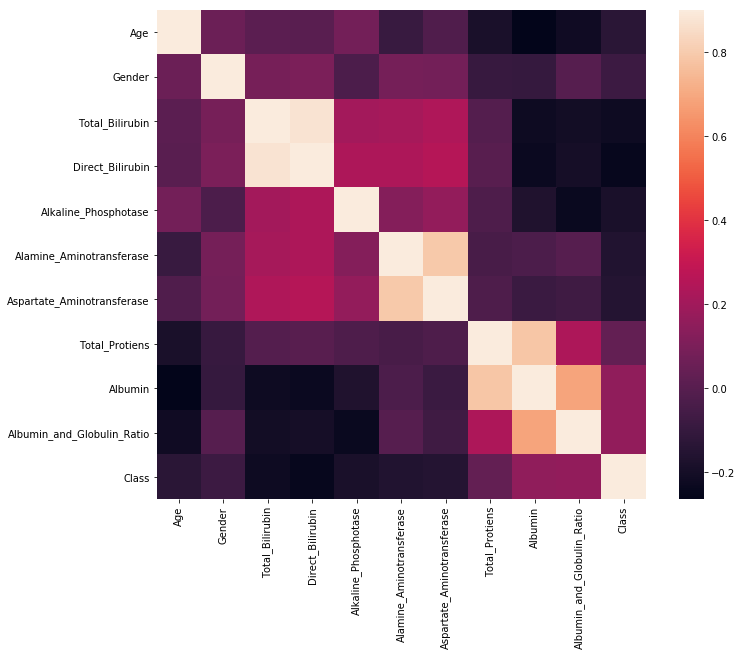

In [6]:
corrmat = dataset.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .9, square = True,)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(dataset, test_size=0.1)
print(train.shape)
print(test.shape)

(522, 11)
(58, 11)


In [8]:
columns = train.columns.tolist()
columns = [c for c in columns if c not in ["Class","Gender","Age"]]
target = "Class"
x_train=train[columns]
y_train=train[target]
print(x_train.shape)
print(y_train.shape)

columns = train.columns.tolist()
columns = [c for c in columns if c not in ["Class","Gender","Age"]]
target = "Class"
x_test=test[columns]
y_test=test[target]
print(x_test.shape)
print(y_test.shape)

(522, 8)
(522,)
(58, 8)
(58,)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


classifiers = {
    "AdaBoostClassifier": AdaBoostClassifier(),
    "LogisticRegression":LogisticRegression(),
    "VotingClassifier": VotingClassifier([("AdaBoostClassifier",AdaBoostClassifier()),
                                          ("LogisticRegression",LogisticRegression()),
                                          ("RandomForestClassifier",RandomForestClassifier(bootstrap=False,random_state=1)),
                                          ("GradientBoostingClassifier",GradientBoostingClassifier())]),
    "RandomForestClassifier": RandomForestClassifier(bootstrap=False,random_state=1),
    "GradientBoostingClassifier":GradientBoostingClassifier()
}

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "AdaBoostClassifier":
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        print(clf_name+" Accuracy: " + str(round(accuracy_score(y_pred,y_test)*100,2) )+"%")        

    elif clf_name == "BaggingClassifier":
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        print(clf_name+" Accuracy: " + str(round(accuracy_score(y_pred,y_test)*100,2) )+"%")
        
    elif clf_name == "DecisionTreeClassifier":
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        print(clf_name+" Accuracy: " + str(round(accuracy_score(y_pred,y_test)*100,2) )+"%")
        
    elif clf_name == "LogisticRegression":
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        print(clf_name+" Accuracy: " + str(round(accuracy_score(y_pred,y_test)*100,2) )+"%")

    elif clf_name == "VotingClassifier":
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        print(clf_name+" Accuracy: " + str(round(accuracy_score(y_pred,y_test)*100,2) )+"%")        

    elif clf_name == "ExtraTreesClassifier":
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        print(clf_name+" Accuracy: " + str(round(accuracy_score(y_pred,y_test)*100,2) )+"%")        

    elif clf_name == "RandomForestClassifier":
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        print(clf_name+" Accuracy: " + str(round(accuracy_score(y_pred,y_test)*100,2) )+"%")        

    #elif clf_name == "SVC":
     #   clf.fit(x_train,y_train)
      #  y_pred = clf.predict(x_test)
      #  print(clf_name+" Accuracy: " + str(round(accuracy_score(y_pred,y_test)*100,2) )+"%") 
        
    elif clf_name == "KNeighborsClassifier":
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        print(clf_name+" Accuracy: " + str(round(accuracy_score(y_pred,y_test)*100,2) )+"%")        

    elif clf_name == "GradientBoostingClassifier":
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        print(clf_name+" Accuracy: " + str(round(accuracy_score(y_pred,y_test)*100,2) )+"%")        



AdaBoostClassifier Accuracy: 67.24%
LogisticRegression Accuracy: 65.52%
VotingClassifier Accuracy: 67.24%
RandomForestClassifier Accuracy: 65.52%
GradientBoostingClassifier Accuracy: 68.97%


/Users/rehan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
lr=SVC(kernel='poly',verbose = True)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[LibSVM]